# Inverse Kinematics

Using *ikpy* framework to determine edo robot joints moviment equations.



## Requeriments


In [1]:
import ikpy
import numpy as np
import os
import ikpy.utils.plot as plot_utils
import matplotlib.pyplot as plt

## Testing using edo.urdf file


matrix_pos: [[-1.00000000e+00 -4.91897692e-06 -2.84948568e-05  6.98879409e-02]
 [ 2.84948929e-05 -7.32806695e-06 -1.00000000e+00 -2.15999500e-07]
 [ 4.91876810e-06 -1.00000000e+00  7.32820711e-06  9.61212365e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
orient [[-1.00000000e+00 -4.91897692e-06 -2.84948568e-05]
 [ 2.84948929e-05 -7.32806695e-06 -1.00000000e+00]
 [ 4.91876810e-06 -1.00000000e+00  7.32820711e-06]]
pos: [ 6.98879409e-02 -2.15999500e-07  9.61212365e-01]


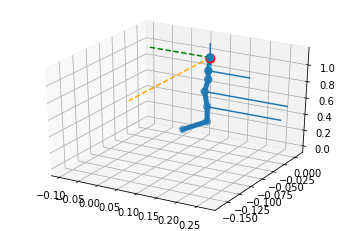

In [2]:
# EDO ROBOT
EDO_URDF_PATH = '../resources/edo_sim.urdf'
base_elements = ['base_link']
#edo_param = ikpy.urdf.URDF.get_urdf_parameters(EDO_URDF_PATH)
edo_robot = ikpy.chain.Chain.from_urdf_file(EDO_URDF_PATH, base_elements)
matrix_pos = edo_robot.forward_kinematics([0]*7)
orient_init = matrix_pos[:3, :3]
pos_init = matrix_pos[:3, 3]
print(f'matrix_pos: {matrix_pos}')
print(f'orient {orient_init}')
print(f'pos: {pos_init}')
axs = plt.figure().add_subplot(111, projection='3d')
edo_robot.plot(edo_robot.inverse_kinematics(pos_init), axs, pos_init, show=True)



In [3]:
print(edo_robot.links)

[Link name=Base link bounds=(None, None), Link name=joint_1 bounds=(None, None), Link name=joint_2 bounds=(None, None), Link name=joint_3 bounds=(None, None), Link name=joint_4 bounds=(None, None), Link name=joint_5 bounds=(None, None), Link name=joint_6 bounds=(None, None)]


## Inverse Kinematics

In Inverse Kinematics, you want your kinematic chain to reach a 3D position in space.

To have a more general representation of position, IKPy works with homogeneous coordinates.
It is a 4x4 matrix storing both position and orientation.
Prepare your desired position as a 4x4 matrix.
Here we only consider position, not orientation of the chain.

The angles of each joints are : [ 0.          0.0490211  27.0271431  25.16596168  1.0146675  12.58095397
  0.        ]


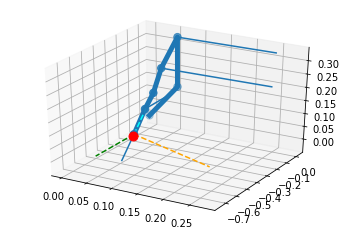

In [4]:
target_vector = np.array([0.1, -0.6, 0.1])
target_frame = np.eye(3)
#target_frame[:3, 3] = target_vector
joint_mov = edo_robot.inverse_kinematics(target_position=target_vector)
print(f'The angles of each joints are : {joint_mov}')

axs = plt.figure().add_subplot(111, projection='3d')
edo_robot.plot(joint_mov, axs, target_vector)